In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
fulfilment = pd.read_csv('fulfilment_center_info.csv')
meal = pd.read_csv('meal_info.csv')

In [4]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
fulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
train = pd.merge(train,fulfilment, on='center_id')
test = pd.merge(test,fulfilment, on='center_id')
train = pd.merge(train,meal, on='meal_id')
test = pd.merge(test,meal, on='meal_id')

train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


## VISUALISATION

In [9]:
pp.ProfileReport(train)

Number of variables,15
Number of observations,456548
Total Missing (%),0.0%
Total size in memory,55.7 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,3
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [10]:
sns.set()

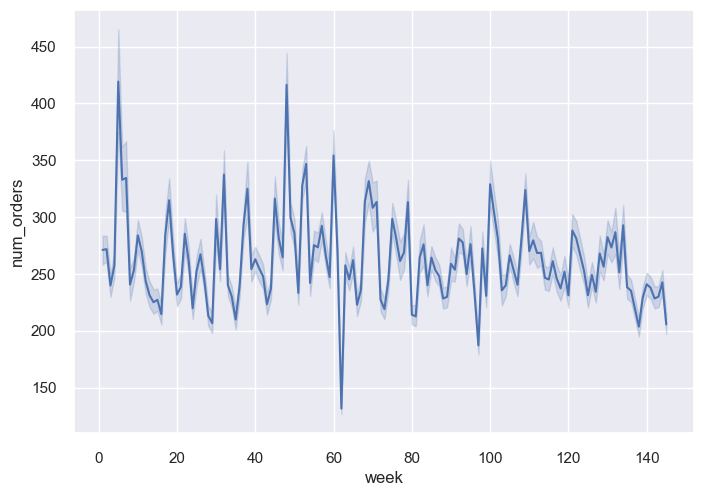

In [11]:
sns.lineplot(train['week'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

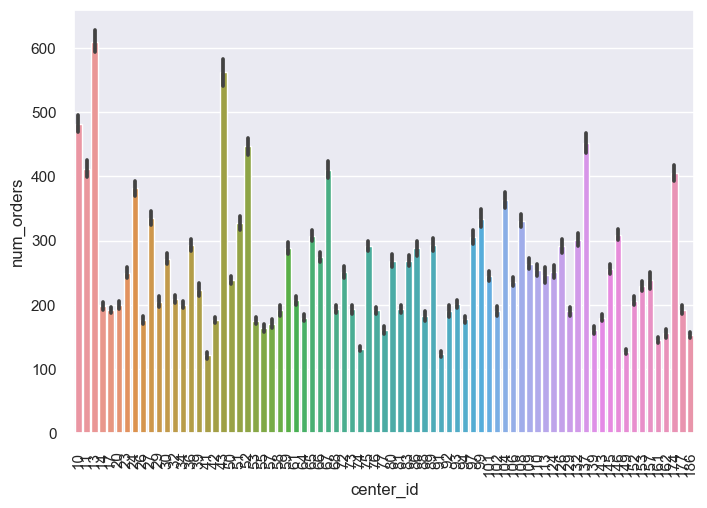

In [12]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)

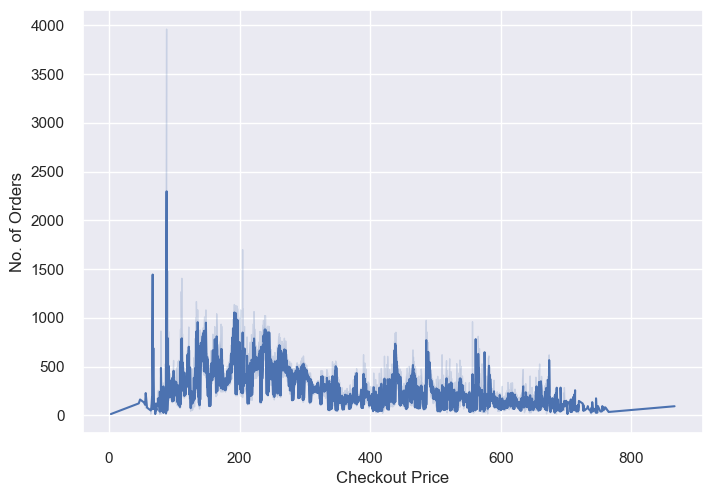

In [13]:
fig = sns.lineplot(train['checkout_price'],train['num_orders'])
fig.set(xlabel='Checkout Price', ylabel='No. of Orders')
plt.show(fig)

[Text(0, 0.5, 'No. of Orders'), Text(0.5, 0, 'Type of Cuisine')]

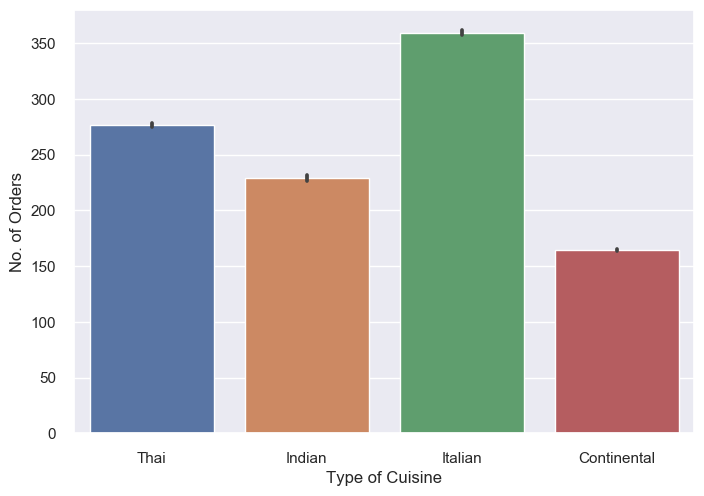

In [14]:
fig1 = sns.barplot(train['cuisine'],train['num_orders'])
fig1.set(xlabel='Type of Cuisine',ylabel='No. of Orders')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 8 Text xticklabel objects>)

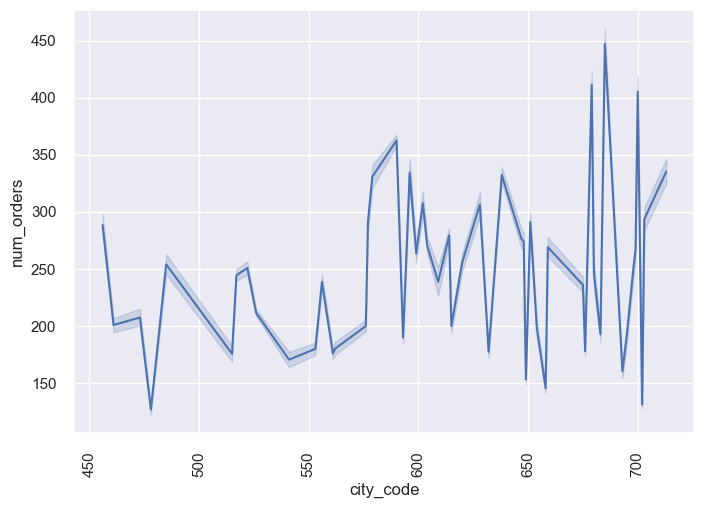

In [15]:
sns.lineplot(train['city_code'], train['num_orders'])
plt.xticks(rotation='90')

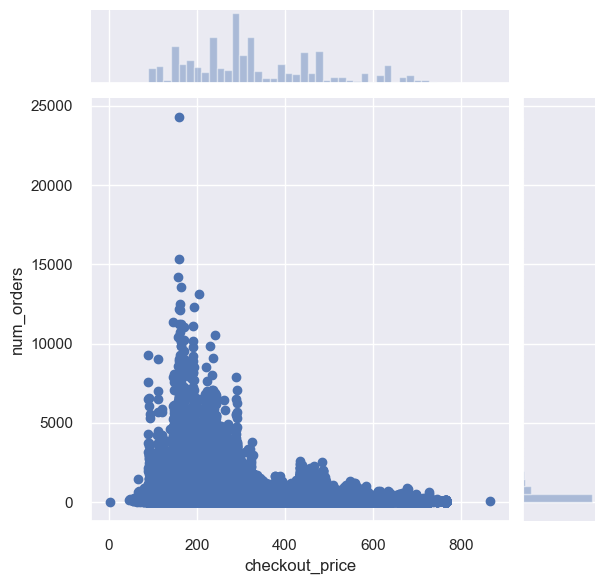

In [16]:
sns.jointplot(x='checkout_price',y='num_orders',data=train)

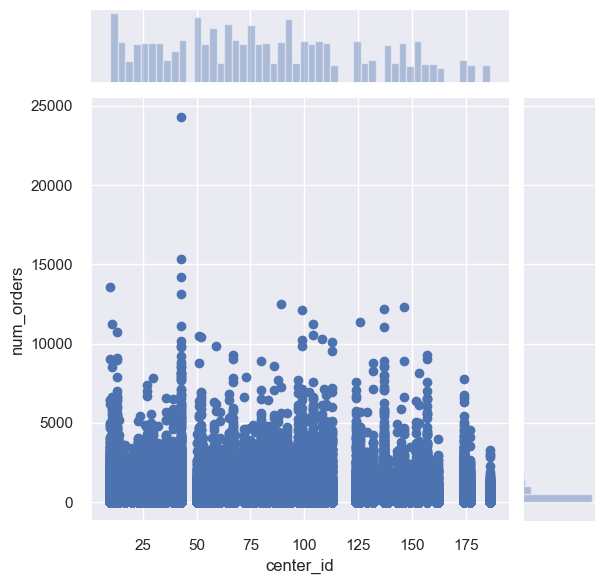

In [17]:
sns.jointplot(x='center_id',y='num_orders',data=train)

## Total number of centers and cities

In [18]:
print("Total number of centers : ",train['center_id'].nunique())

Total number of centers :  77


In [19]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


Here, we observe that some of the cities have more than one centers

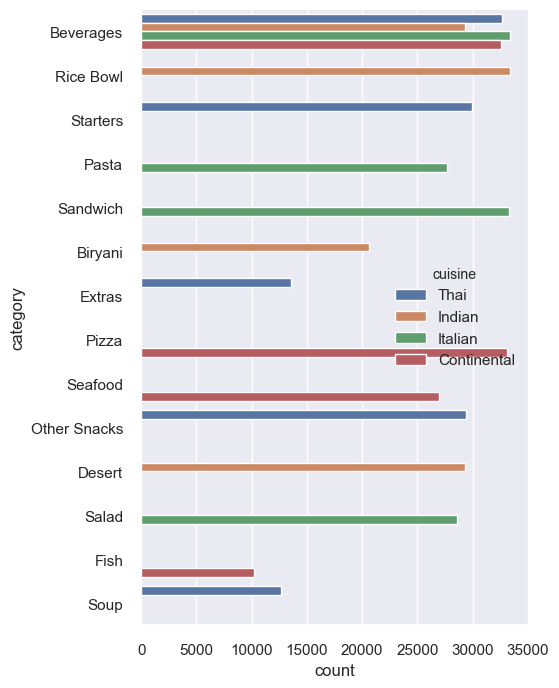

In [20]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

## Center details from train and test dataset

In [21]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")

There are 3597 center-meal pairs in train data


In [22]:
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in test data")

There are 3548 center-meal pairs in test data


In [23]:
print("There are",len(set(center_meal_test) - set(center_meal_train)),"New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'73_2956', '73_1571', '92_2104'}


Here, we observe 3 new centers in the test dataset which are not present in the train dataset

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.

## Removing Outliers

In [24]:
outlier_index = train[(train['num_orders']>15000)].index

In [25]:
train.drop(outlier_index,inplace = True)

The values for 'num_orders' having value greater than 15000 are acting here as outliers but are removed now.

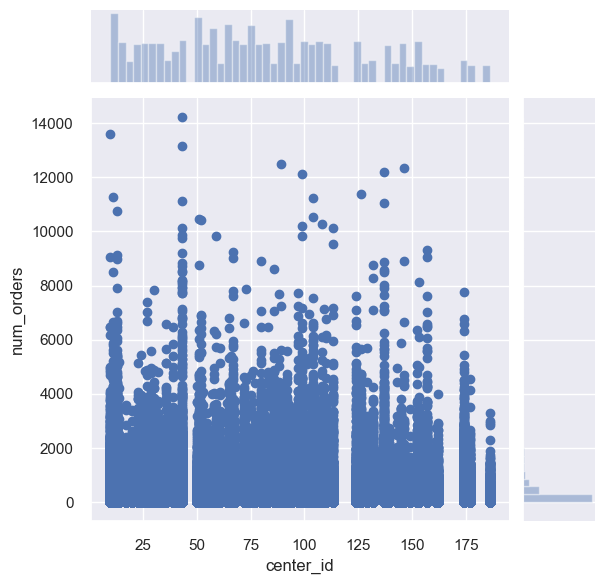

In [26]:
sns.jointplot(x='center_id',y='num_orders',data=train)

## Data Processing

In [27]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [28]:
train['num_orders'] = np.log1p(train['num_orders'])

In [29]:
total_data = train.append(test).reset_index(drop=True)[train.columns]

C:\Users\Ansh Pujara\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [30]:
total_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,train_or_test
0,1379560,1,55,1885,136.83,152.29,0,0,5.181784,647,56,TYPE_C,2.0,Beverages,Thai,train
1,1018704,2,55,1885,135.83,152.29,0,0,5.780744,647,56,TYPE_C,2.0,Beverages,Thai,train
2,1196273,3,55,1885,132.92,133.92,0,0,4.574711,647,56,TYPE_C,2.0,Beverages,Thai,train
3,1116527,4,55,1885,135.86,134.86,0,0,5.099866,647,56,TYPE_C,2.0,Beverages,Thai,train
4,1343872,5,55,1885,146.50,147.50,0,0,5.375278,647,56,TYPE_C,2.0,Beverages,Thai,train
5,1493612,6,55,1885,146.53,146.53,0,0,5.655992,647,56,TYPE_C,2.0,Beverages,Thai,train
6,1110832,7,55,1885,145.53,146.53,0,0,5.003946,647,56,TYPE_C,2.0,Beverages,Thai,train
7,1461167,8,55,1885,146.53,145.53,0,0,4.912655,647,56,TYPE_C,2.0,Beverages,Thai,train
8,1102364,9,55,1885,134.83,134.83,0,0,5.170484,647,56,TYPE_C,2.0,Beverages,Thai,train
9,1018130,10,55,1885,144.56,143.56,0,0,5.170484,647,56,TYPE_C,2.0,Beverages,Thai,train


In [31]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [32]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])

In [33]:
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]

In [34]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)

In [35]:
# Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df


# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [36]:
# Applying the lag features to the dataset
total_data = create_sales_lag_feats(total_data, gpby_cols=['center_id','meal_id'], target_col='num_orders', 
                               lags=[10,11, 12])

total_data = create_sales_ewm_feats(total_data, gpby_cols=['center_id','meal_id'], 
                               target_col='num_orders', 
                               alpha=[0.5], 
                               shift=[10,11,12,13,14,15])

In [37]:
total_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,price_last_curr_diff,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
0,1436842,1,10,1062,5.206147,5.206147,0,0,6.763885,590,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1205013,2,10,1062,5.216890,5.211451,0,0,6.663133,590,...,-0.002064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1447751,3,10,1062,5.222300,5.211451,0,0,6.747587,590,...,-0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1014968,4,10,1062,5.211451,5.216890,0,0,7.092574,590,...,0.002077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003563,5,10,1062,5.217053,5.206147,0,0,6.865891,590,...,-0.001075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Counting the centers
gdf = total_data.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "week"], how="left")

gdf = total_data.groupby(["center_id", "category"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "category", "center_category_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category"], how="left")

gdf = total_data.groupby(["center_id", "cuisine"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "cuisine", "center_cuisine_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "cuisine"], how="left")

In [39]:
# Counting the meals
gdf = total_data.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on=["region_code", "meal_id"], how="left")

gdf = total_data.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on=[ "meal_id", "week"], how="left")

gdf =total_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_type", "meal_id", "week"], how="left")

gdf = total_data.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["region_code", "meal_id", "week"], how="left")

gdf =total_data.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

In [40]:
total_data["meal_price_rank"] = total_data.groupby("meal_id")["checkout_price"].rank()
total_data["meal_city_price_rank"] =total_data.groupby(["meal_id", "city_code"])["checkout_price"].rank()
total_data["meal_region_price_rank"] = total_data.groupby(["meal_id", "region_code"])["checkout_price"].rank()
total_data["meal_week_price_rank"] = total_data.groupby(["meal_id", "week"])["checkout_price"].rank()

total_data["center_price_rank"] = total_data.groupby("center_id")["checkout_price"].rank()
total_data["center_week_price_rank"] = total_data.groupby(["center_id", "week"])["checkout_price"].rank()
total_data["center_cat_price_rank"] = total_data.groupby(["center_id", "category"])["checkout_price"].rank()

In [41]:
gdf = total_data.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean", "meal_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean", "disc_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["city_code","meal_id", "week"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["city_code", "meal_id", "week", "meal_price2_min", "meal_price2_max", "meal_price2_mean", "meal_price2_std"]
total_data= pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

gdf = total_data.groupby(["city_code", "category"])["checkout_price"].agg(["mean", "std"]).reset_index()
gdf.columns = ["city_code", "category", "meal_price3_mean", "meal_price3_std"]
total_datal = pd.merge(total_data,gdf, on=["city_code", "category"], how="left")

In [42]:
total_data['center_id'] = total_data['center_id'].astype(np.object)
total_data['meal_id'] = total_data['meal_id'].astype(np.object)
total_data['region_code'] = total_data['region_code'].astype(np.object)
total_datal['city_code'] = total_data['city_code'].astype(np.object)

In [43]:
train_data = total_data.loc[total_data['train_or_test']=='train', :]
test_data = total_data.loc[total_data['train_or_test']=='test', :]

In [44]:
center_meal_mean = train_data.groupby(['center_id','meal_id'])['num_orders'].mean()
center_meal_mean = center_meal_mean.reset_index()
center_meal_mean = center_meal_mean.rename(columns={'num_orders':'avg_orders'})
train_data = pd.merge(train_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
test_data = pd.merge(test_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
center_mean = train_data.groupby('center_id')['num_orders'].mean()
center_mean = center_mean.reset_index()
center_mean = center_mean.rename(columns={'num_orders':'avg_center'})
train_data = pd.merge(train_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
test_data = pd.merge(test_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
meal_mean = train_data.groupby('meal_id')['num_orders'].mean()
meal_mean = meal_mean.reset_index()
meal_mean = meal_mean.rename(columns={'num_orders':'avg_meal'})
train_data = pd.merge(train_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])
test_data = pd.merge(test_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456545
Data columns (total 59 columns):
id                           456546 non-null int64
week                         456546 non-null int64
center_id                    456546 non-null object
meal_id                      456546 non-null object
checkout_price               456546 non-null float64
base_price                   456546 non-null float64
emailer_for_promotion        456546 non-null int64
homepage_featured            456546 non-null int64
num_orders                   456546 non-null float64
city_code                    456546 non-null int64
region_code                  456546 non-null object
center_type                  456546 non-null object
op_area                      456546 non-null float64
category                     456546 non-null object
cuisine                      456546 non-null object
train_or_test                456546 non-null object
discount_on_base             456546 non-null float64
disco

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 59 columns):
id                           32573 non-null int64
week                         32573 non-null int64
center_id                    32573 non-null object
meal_id                      32573 non-null object
checkout_price               32573 non-null float64
base_price                   32573 non-null float64
emailer_for_promotion        32573 non-null int64
homepage_featured            32573 non-null int64
num_orders                   0 non-null float64
city_code                    32573 non-null int64
region_code                  32573 non-null object
center_type                  32573 non-null object
op_area                      32573 non-null float64
category                     32573 non-null object
cuisine                      32573 non-null object
train_or_test                32573 non-null object
discount_on_base             32573 non-null float64
discount_ratio              

## Applying the Model

In [47]:
avoid_column = ['id', 'num_orders', 'train_or_test']

In [48]:
features = [col for col in test_data.columns if col not in avoid_column]

In [49]:
features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5',
 'center_week_count',
 'center_category_count',
 'center_cuisine_count',
 'meal_count',
 'region_meal_count_x',
 'region_meal_count_y',
 'type_meal_week_count',
 'region_meal_week_count',
 'city_meal_week_count',
 'meal_price_rank',
 'meal_city_price_rank',
 'meal_region_price_rank',
 'meal_week_price_rank',
 'center_price_rank',
 'center_week_price_rank',
 'center_cat_price_rank',
 'meal_price_min',
 'meal_price_max',
 'meal_price_mean',
 'meal_price_std',
 'disc_price_min',
 'disc_p

In [50]:
categorical_features_indices = np.where(train_data[features].dtypes =='object')[0]
categorical_features_indices

array([ 1,  2,  8,  9, 11, 12], dtype=int64)

In [51]:
from catboost import CatBoostRegressor
from catboost import Pool

In [52]:
model = CatBoostRegressor(iterations=2000, 
    learning_rate=0.02, 
    max_depth=8, 
    l2_leaf_reg=10, 
    loss_function='RMSE',
    random_seed=2019,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    use_best_model=True)

In [53]:
errcb=[]
y_pred_test=[]

fold = KFold(n_splits=5,shuffle=True,random_state=2019)

for train_index, test_index in fold.split(train_data[features],train_data['num_orders']):
    X_train, X_valid =train_data[features].iloc[train_index], train_data[features].iloc[test_index]
    y_train, y_valid = train_data['num_orders'][train_index],train_data['num_orders'][test_index]
    model.fit(X_train,y_train,
              cat_features = categorical_features_indices,
              eval_set=(X_valid,y_valid),
              early_stopping_rounds=300,
              verbose=100)
    preds = model.predict(X_valid)
    print("err: ",np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
    p = model.predict(test_data[features])
    y_pred_test.append(p)

0:	learn: 1.1849495	test: 1.1842137	best: 1.1842137 (0)	total: 436ms	remaining: 14m 30s
100:	learn: 0.5387147	test: 0.5404269	best: 0.5404269 (100)	total: 36.8s	remaining: 11m 31s
200:	learn: 0.4972571	test: 0.4996183	best: 0.4996183 (200)	total: 1m 14s	remaining: 11m 3s
300:	learn: 0.4867833	test: 0.4895212	best: 0.4895212 (300)	total: 1m 48s	remaining: 10m 11s
400:	learn: 0.4802322	test: 0.4833829	best: 0.4833829 (400)	total: 2m 23s	remaining: 9m 33s
500:	learn: 0.4753853	test: 0.4789453	best: 0.4789453 (500)	total: 2m 59s	remaining: 8m 58s
600:	learn: 0.4714269	test: 0.4754171	best: 0.4754171 (600)	total: 3m 35s	remaining: 8m 20s
700:	learn: 0.4681732	test: 0.4724973	best: 0.4724973 (700)	total: 4m 11s	remaining: 7m 45s
800:	learn: 0.4651974	test: 0.4699053	best: 0.4699053 (800)	total: 4m 46s	remaining: 7m 8s
900:	learn: 0.4627250	test: 0.4678140	best: 0.4678140 (900)	total: 5m 21s	remaining: 6m 32s
1000:	learn: 0.4606702	test: 0.4661043	best: 0.4661043 (1000)	total: 5m 57s	remainin

200:	learn: 0.4978788	test: 0.4967430	best: 0.4967430 (200)	total: 1m 11s	remaining: 10m 42s
300:	learn: 0.4874222	test: 0.4866644	best: 0.4866644 (300)	total: 1m 47s	remaining: 10m 4s
400:	learn: 0.4809177	test: 0.4805693	best: 0.4805693 (400)	total: 2m 22s	remaining: 9m 27s
500:	learn: 0.4762491	test: 0.4762470	best: 0.4762470 (500)	total: 2m 57s	remaining: 8m 50s
600:	learn: 0.4724677	test: 0.4728302	best: 0.4728302 (600)	total: 3m 32s	remaining: 8m 14s
700:	learn: 0.4694086	test: 0.4700639	best: 0.4700639 (700)	total: 4m 7s	remaining: 7m 37s
800:	learn: 0.4668297	test: 0.4677524	best: 0.4677524 (800)	total: 4m 42s	remaining: 7m 3s
900:	learn: 0.4647811	test: 0.4659529	best: 0.4659529 (900)	total: 5m 16s	remaining: 6m 26s
1000:	learn: 0.4626732	test: 0.4641124	best: 0.4641124 (1000)	total: 5m 51s	remaining: 5m 50s
1100:	learn: 0.4607331	test: 0.4624687	best: 0.4624687 (1100)	total: 6m 26s	remaining: 5m 15s
1200:	learn: 0.4587487	test: 0.4607934	best: 0.4607934 (1200)	total: 7m 2s	re

In [54]:
model.fit(train_data[features], train_data['num_orders'], cat_features=categorical_features_indices, verbose=100,eval_set=(X_valid,y_valid))

0:	learn: 1.1848349	test: 1.1839878	best: 1.1839878 (0)	total: 459ms	remaining: 15m 16s
100:	learn: 0.5390350	test: 0.5373900	best: 0.5373900 (100)	total: 44.3s	remaining: 13m 53s
200:	learn: 0.4974670	test: 0.4960344	best: 0.4960344 (200)	total: 1m 27s	remaining: 13m 2s
300:	learn: 0.4866905	test: 0.4853318	best: 0.4853318 (300)	total: 2m 10s	remaining: 12m 15s
400:	learn: 0.4803814	test: 0.4790670	best: 0.4790670 (400)	total: 2m 52s	remaining: 11m 28s
500:	learn: 0.4758391	test: 0.4745581	best: 0.4745581 (500)	total: 3m 35s	remaining: 10m 43s
600:	learn: 0.4721986	test: 0.4709317	best: 0.4709317 (600)	total: 4m 17s	remaining: 10m
700:	learn: 0.4687842	test: 0.4675093	best: 0.4675093 (700)	total: 5m 1s	remaining: 9m 18s
800:	learn: 0.4660605	test: 0.4647962	best: 0.4647962 (800)	total: 5m 44s	remaining: 8m 35s
900:	learn: 0.4638908	test: 0.4626309	best: 0.4626309 (900)	total: 6m 26s	remaining: 7m 51s
1000:	learn: 0.4618946	test: 0.4606405	best: 0.4606405 (1000)	total: 7m 9s	remaining:

In [55]:
pred = model.predict(test_data[features])

In [56]:
pred = (np.exp(pred) - 1)

In [57]:
submission = pd.DataFrame({'id':test['id'],'num_orders':pred})
submission = submission[['id','num_orders']]
submission.head()

,id,num_orders
0,1028232,1010.970397
1,1262649,1033.469706
2,1453211,1008.719011
3,1262599,812.400996
4,1495848,990.615379


In [58]:
submission.to_csv('catboost_1.csv', index=False)

In [59]:
feature_score = pd.DataFrame(list(zip(train_data[features].dtypes.index, model.get_feature_importance(Pool(train_data[features], label=train_data['num_orders'], cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

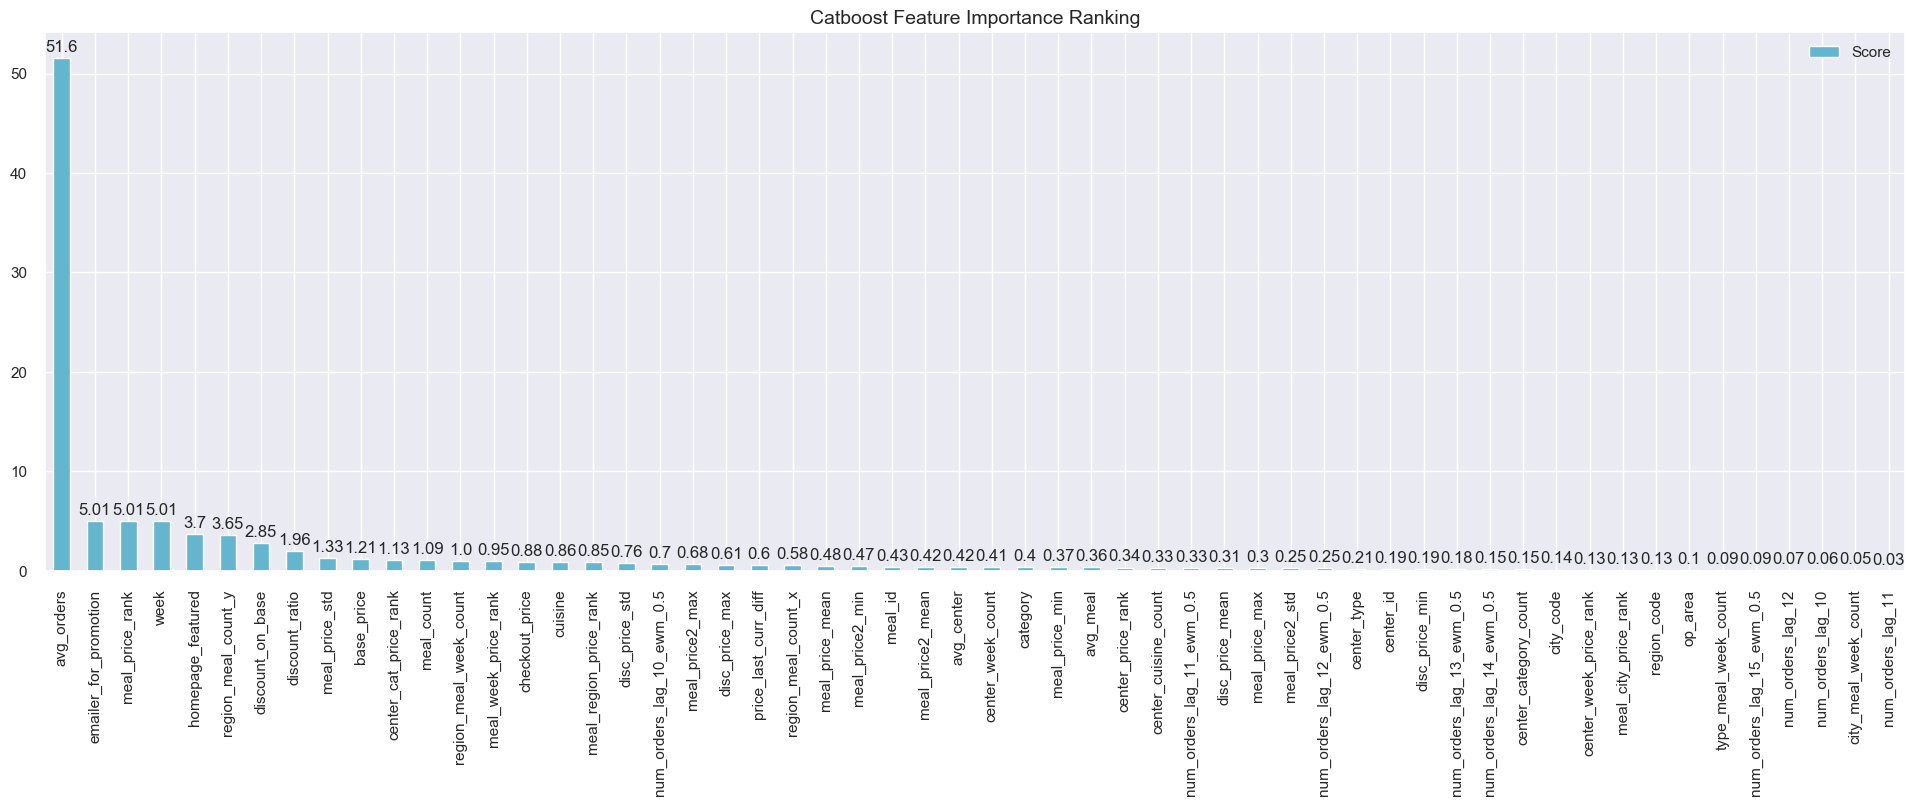

In [60]:
plt.rcParams["figure.figsize"] = (24,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [3]:
#!pip install plotly

  Stored in directory: C:\Users\Ansh Pujara\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [ ]:
pool=Pool(train_data[features], label=train_data['num_orders'], cat_features=categorical_features_indices)
model.plot_tree(tree_idx=0,pool=None)